In [46]:
import pandas as pd
import graphviz
from python_scripts import csv_processing as dp
from python_scripts import evaluation

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer

##### Import Data

In [47]:
df = pd.read_csv("../data/3year.csv")

In [48]:
X_train, X_test, y_train, y_test = dp.pre_process(df)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/valid

##### Decision Tree Model

In [49]:
dt = DecisionTreeClassifier(criterion="entropy", splitter="best", random_state=0)

##### XGBoost

In [50]:
import xgboost as xgb

xgb_classifier = xgb.XGBClassifier()

In [51]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtrain.save_binary("train.buffer")
dtest = xgb.DMatrix(X_test, label=y_test)

In [52]:
param = {"max_depth": 2, "eta": 1, "objective": "binary:logistic"}
param["nthread"] = 4
param["eval_metric"] = "auc"

In [53]:
evallist = [(dtrain, "train"), (dtest, "eval")]

##### Training

In [54]:
num_round = 10
bst = xgb.train(param, dtrain, num_round, evallist)

[0]	train-auc:0.74752	eval-auc:0.70775
[1]	train-auc:0.79291	eval-auc:0.74325
[2]	train-auc:0.81461	eval-auc:0.74688
[3]	train-auc:0.83889	eval-auc:0.75093
[4]	train-auc:0.84903	eval-auc:0.75883
[5]	train-auc:0.85956	eval-auc:0.76788
[6]	train-auc:0.86640	eval-auc:0.77629
[7]	train-auc:0.87572	eval-auc:0.77999
[8]	train-auc:0.88010	eval-auc:0.77758
[9]	train-auc:0.88428	eval-auc:0.77083


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/core.py:727: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


In [55]:
bst.save_model("bst1.model")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [16:14:43] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


In [56]:
ypred = bst.predict(dtest)

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

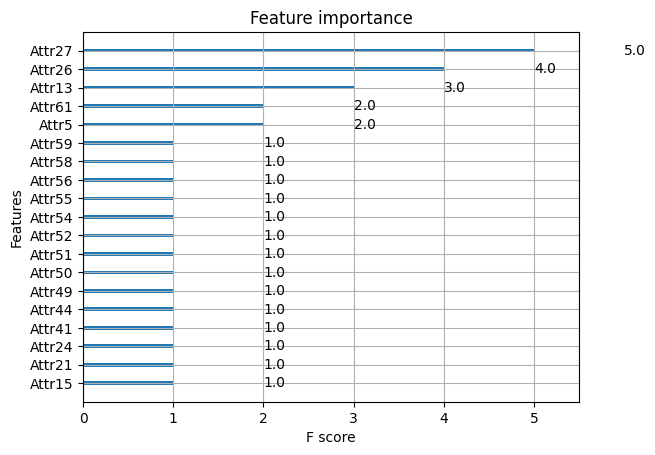

In [57]:
xgb.plot_importance(bst)

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

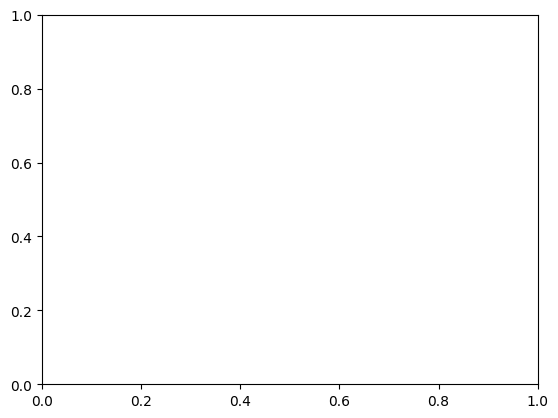

In [59]:
xgb.plot_tree(bst, num_trees=2, graphviz="/usr/local/Cellar/graphviz")

In [ ]:
xgb.to_graphviz(bst, num_trees=2)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH